In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MessageError: Error: credential propagation was unsuccessful

# Nueva sección

In [ ]:
df=pd.read_csv('/Carbon Dioxide Emission Estimates.csv')
dfl=pd.read_csv('/Land.csv')


In [ ]:
AñosE = df['Year'].unique()
AñosL = dfl['Year'].unique()

# Encontrar los años coincidentes
años_coincidentes = np.intersect1d(AñosE, AñosL)
DFETCO2 = df[(df['Year'].isin(años_coincidentes))]
DFLand=dfl[(dfl['Year'].isin(años_coincidentes))]
DFETCO2.columns=['Country','Year','Type','Value']
DFLand.columns=['Country','Year','Type','Value']
#OTRA MANERA
#AñosE = set(df['Year'].unique())
#AñosL = set(dfl['Year'].unique())
#años_coincidentes = list(AñosE.intersection(AñosL))
#print(años_coincidentes)
#Este código utiliza set() para convertir los arrays de años únicos en conjuntos y luego aplica la función intersection() para encontrar la intersección de los conjuntos, es decir, los años que son comunes en ambos DataFrames. La lista resultante, años_coincidentes, contendrá esos años.
#DFETCO2 = df[(df['Year'].isin(años_coincidentes))]
#DFLand=dfl[(dfl['Year'].isin(años_coincidentes))]

In [ ]:

paises=DFLand['Country'].unique()
paises=[(pais.split(' ')[0]) for pais in paises] #1.pais.split(): Para cada pais en paises_sudamerica, pais.split() divide la cadena pais en palabras (separadas por espacios) y devuelve una lista con estas palabras.
#2 pais.split()[0]: Después de dividir la cadena pais en palabras, [0] se agrega para seleccionar solo el primer elemento de esta lista (es decir, la primera palabra de pais).}
#3 [pais.split()[0] for pais in paises_sudamerica]: Esto es una comprensión de lista, que combina un bucle for con una expresión de lista. En cada iteración del bucle for, se ejecuta la expresión pais.split()[0], que toma la lista de palabras generada por pais.split() y selecciona solo el primer elemento de esta lista. El resultado es una nueva lista que contiene solo las primeras palabras de cada elemento en la lista paises_sudamerica.
paises_sudamerica = [
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Ecuador",
    "Guyana",
    "Paraguay",
    "Peru",
    "Suriname",
    "Uruguay",
    "Venezuela"
]
paises_coincidentes = np.intersect1d(paises, paises_sudamerica)
paises_coincidentes

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
      dtype='<U13')

In [ ]:
#SI HAGO COPIA DEL DF:
#DFLandcopy=DFLand.copy()
#DFLandcopy['Country_processed'] = DFLandcopy['Country'].apply(lambda x: x.split()[0])#si quiero volver todo minusculas uso .str.lower
#DFLandcopy
#dfpaisesañosL = DFLandcopy[DFLandcopy['Country_processed'].isin(paises_coincidentes)]
#dfpaisesañosL=dfpaisesañosL.drop(columns=['Country_processed'])
#dfpaisesañosL
#DFLandcopy.loc[DFLandcopy['Country_processed']== "Bolivia"]
#SI NO HAGO COPIA DEL DF:
DFLand['Country_processed'] = DFLand['Country'].apply(lambda x: x.split()[0])
#si quiero volver todo minusculas uso .str.lower. lambda x equivale a:  [pais.split()[0] for pais in paises]
dfpaisesañosL = DFLand[DFLand['Country_processed'].isin(paises_coincidentes)]
dfpaisesañosL=dfpaisesañosL.drop(columns=['Country_processed'])
dfpaisesañosL['Country'].unique()

<ipython-input-15-a34a1c2bfd4b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFLand['Country_processed'] = DFLand['Country'].apply(lambda x: x.split()[0])


array(['Argentina', 'Bolivia (Plurin. State of)', 'Brazil', 'Chile',
       'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
       'Uruguay', 'Venezuela (Boliv. Rep. of)'], dtype=object)

In [ ]:
DFETCO2['Country_processed'] = DFETCO2['Country'].apply(lambda x: x.split()[0])
dfpaisesañosE = DFETCO2[DFETCO2['Country_processed'].isin(paises_coincidentes)]
dfpaisesañosE=dfpaisesañosE.drop(columns=['Country_processed'])
dfpaisesañosE['Country'].unique()

<ipython-input-12-e887b4ba9934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFETCO2['Country_processed'] = DFETCO2['Country'].apply(lambda x: x.split()[0])


array(['Argentina', 'Bolivia (Plurin. State of)', 'Brazil', 'Chile',
       'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Suriname', 'Uruguay',
       'Venezuela (Boliv. Rep. of)'], dtype=object)

In [ ]:
dfpaisesañosE.info()
dfpaisesañosL.info()
dfpaisesañosL['Type'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 51 to 2067
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  66 non-null     object 
 1   Year     66 non-null     int64  
 2   Type     66 non-null     object 
 3   Value    66 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 864 to 6021
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  285 non-null    object 
 1   Year     285 non-null    int64  
 2   Type     285 non-null    object 
 3   Value    285 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.1+ KB


array(['Land area (thousand hectares)', 'Arable land (thousand hectares)',
       'Permanent crops (thousand hectares)',
       'Forest cover (thousand hectares)',
       'Arable land (% of total land area)',
       'Permanent crops (% of total land area)',
       'Forest cover (% of total land area)',
       'Important sites for terrestrial biodiversity protected (% of total sites protected)'],
      dtype=object)

In [ ]:
#dividir dataframes por type
#Emissions
datae_a=dfpaisesañosE[dfpaisesañosE['Type']=='Emissions per capita (metric tons of carbon dioxide)']
datae_b=dfpaisesañosE[dfpaisesañosE['Type']=='Emissions (thousand metric tons of carbon dioxide)']
#Land
datal_a=dfpaisesañosL[dfpaisesañosL['Type']=='Land area (thousand hectares)']
datal_b=dfpaisesañosL[dfpaisesañosL['Type']=='Permanent crops (thousand hectares)']
datal_c=dfpaisesañosL[dfpaisesañosL['Type']=='Forest cover (thousand hectares)']
datal_d=dfpaisesañosL[dfpaisesañosL['Type']=='Arable land (thousand hectares)']

In [107]:
#Escribir datos en excel
#Emisiones
from pandas import ExcelWriter
with pd.ExcelWriter('/Carbon Dioxide Emission Estimates1.xlsx') as writer:
  datae_a.to_excel(writer,sheet_name='Emissions per capita',index=False)
  datae_b.to_excel(writer ,sheet_name='Emissions',index=False)



In [109]:
#Escribir datos en excel
#Land
with pd.ExcelWriter('/Land1.xlsx') as writer:
  datal_a.to_excel(writer,sheet_name='Land area',index=False)
  datal_b.to_excel(writer ,sheet_name='Permanent crops',index=False)
  datal_c.to_excel(writer ,sheet_name='Forest cover',index=False)
  datal_d.to_excel(writer ,sheet_name='Arable land',index=False)

In [110]:
#Escribir datos en excel
#Todos en uno
with pd.ExcelWriter('/Dataclean.xlsx') as writer:
  datae_a.to_excel(writer,sheet_name='Emissions per capita',index=False)
  datae_b.to_excel(writer ,sheet_name='Emissions',index=False)
  datal_a.to_excel(writer,sheet_name='Land area',index=False)
  datal_b.to_excel(writer ,sheet_name='Permanent crops',index=False)
  datal_c.to_excel(writer ,sheet_name='Forest cover',index=False)
  datal_d.to_excel(writer ,sheet_name='Arable land',index=False)


In [ ]:
import seaborn as sns

<ipython-input-82-42c0036f2ee0>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country',y='Value',hue='Country', ci=None, data=datasorted,order=None)


<Axes: xlabel='Country', ylabel='Value'>

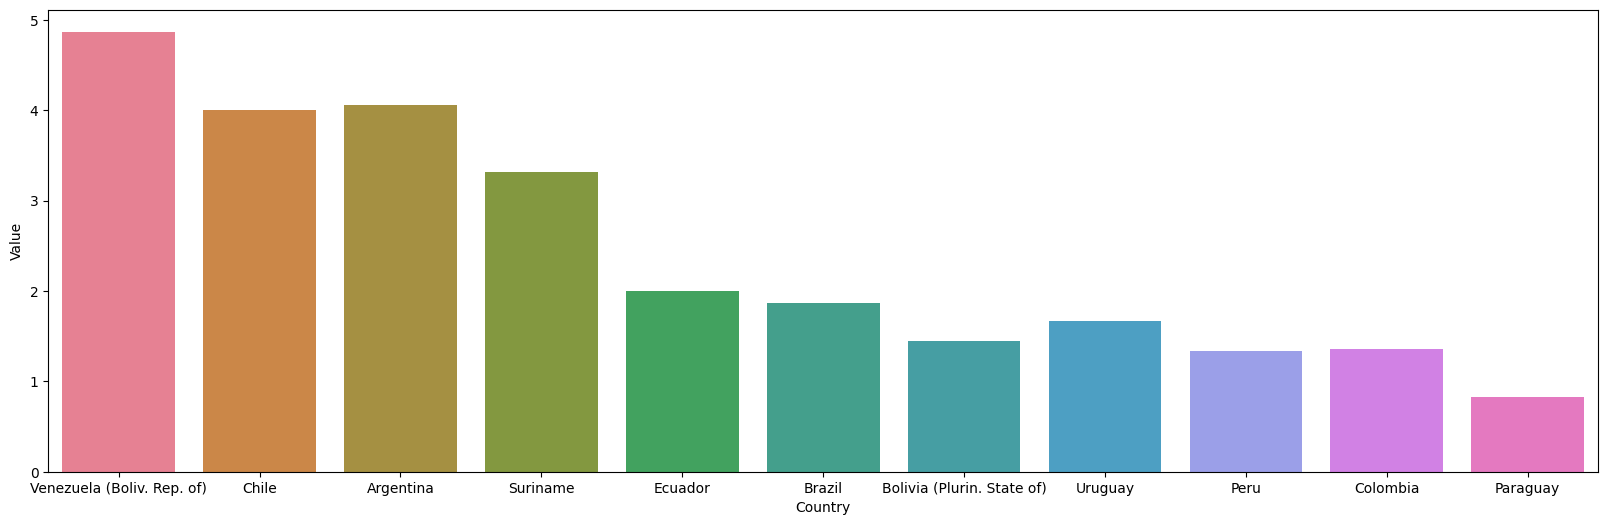

In [ ]:
plt.figure(figsize=(20, 6))
data_a=dfpaisesañosE[dfpaisesañosE['Type']=='Emissions per capita (metric tons of carbon dioxide)']
datasorted=data_a.sort_values(by='Value',ascending=False)
sns.barplot(x='Country',y='Value',hue='Country', ci=None, data=datasorted,order=None)